In [3]:
# Import libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob

# Image size
IMAGE_SIZE = [224, 224]

# Paths
potato_path = '../Datasets/plantvillage dataset/color'
potato_classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [4]:
# MobileNetV2 base model
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze pre-trained layers
for layer in mobilenet.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(mobilenet.output)
x = Dense(128, activation='relu')(x)
prediction = Dense(len(potato_classes), activation='softmax')(x)
model = Model(inputs=mobilenet.input, outputs=prediction)

# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [5]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training set
training_set = datagen.flow_from_directory(
    potato_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=potato_classes
)

# Validation set
validation_set = datagen.flow_from_directory(
    potato_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=potato_classes
)

# Train
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/10
54/54 [==============================] - 57s 972ms/step - loss: 0.2456 - accuracy: 0.9123 - val_loss: 0.1776 - val_accuracy: 0.9326
Epoch 2/10
54/54 [==============================] - 52s 970ms/step - loss: 0.0954 - accuracy: 0.9634 - val_loss: 0.0591 - val_accuracy: 0.9791
Epoch 3/10
54/54 [==============================] - 51s 945ms/step - loss: 0.0640 - accuracy: 0.9756 - val_loss: 0.0348 - val_accuracy: 0.9860
Epoch 4/10
54/54 [==============================] - 51s 936ms/step - loss: 0.0461 - accuracy: 0.9872 - val_loss: 0.0527 - val_accuracy: 0.9791
Epoch 5/10
54/54 [==============================] - 52s 959ms/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.0580 - val_accuracy: 0.9791
Epoch 6/10
54/54 [==============================] - 95s 2s/step - loss: 0.0429 - accuracy: 0.9843 - val_loss: 0.0585 - val_accuracy: 0.9767
Epoch 7/10
54/54 [==============================] - 103s 2s/st

In [6]:
# Evaluate
loss, accuracy = model.evaluate(validation_set)
print(f"MobileNetV2 Potato - Validation Loss: {loss}")
print(f"MobileNetV2 Potato - Validation Accuracy: {accuracy}")

14/14 [==============================] - 23s 2s/step - loss: 0.0439 - accuracy: 0.9814
MobileNetV2 Potato - Validation Loss: 0.043898805975914
MobileNetV2 Potato - Validation Accuracy: 0.9813953638076782


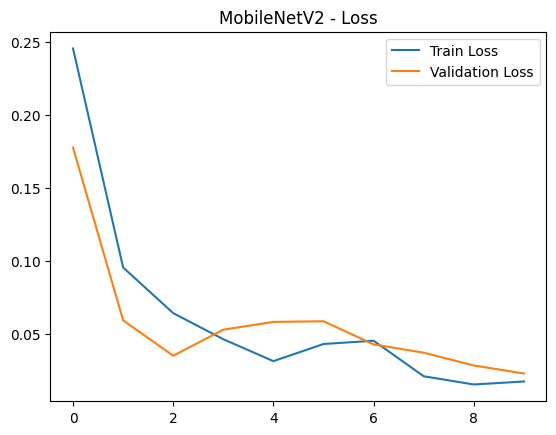

In [7]:
# Plot Loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('MobileNetV2 - Loss')
plt.show()

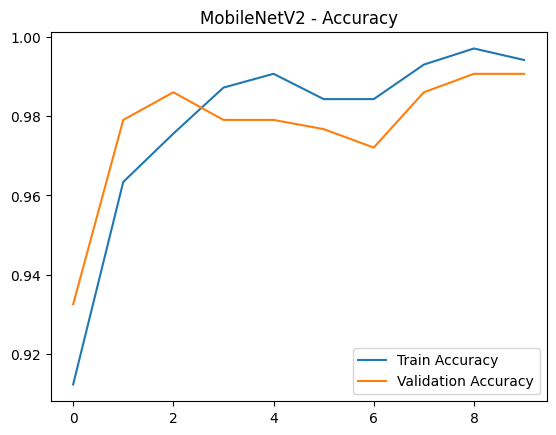

In [8]:
# Plot Accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('MobileNetV2 - Accuracy')
plt.show()

In [9]:
# Save model
model.save('../Models/potato_mobilenetv2.h5')